## COP and COG estimation by derivative method
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the next function:
Ao tentar estimar o COP e COG usamos a função linear que não deu resultados proximos, assim começamos a testar diferentes tipos de relacões, e uma delas é a fórmula:
COP= COG-(4/g*3*d²derivadasegundaTeta)

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [23]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [24]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Thu Nov 25 17:38:51 2021 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [25]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

Let's load the force plate and kinematics data of one subject:

In [26]:
fname_grf = os.path.join(path2, PDSinfo.Trial[150] + 'grf' + '.txt') 
fname_mkr = os.path.join(path2, PDSinfo.Trial[150] + 'mkr' + '.txt')
grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
print(fname_grf, grf.shape)
print(fname_mkr, mkr.shape)

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1grf.txt (6000, 21)
C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDS13CR1mkr.txt (6000, 130)


Para calcular a distância da equação devemos fazer a raiz da soma do COG das 3 dimensões ao quadrado, como abaixo:

In [27]:
COGX=mkr['COG_X']
COGY=mkr['COG_Y']
COGZ=mkr['COG_Z']
d= (COGX**2+COGY**2+COGZ**2)**0.5

Para calcularmos a derivada do ângulo primeiro precisamos achar o próprio ângulo que será dado pelo arcsen(COG/d)

In [28]:
angulox= np.arcsin(COGX/d)
anguloz=np.arcsin(COGZ/d)
matrizangx=np.array(angulox[30:])
matrizangz=np.array(anguloz[30:])

Para chegarmos na primeira derivada devemos usar a seguinte fórmula 
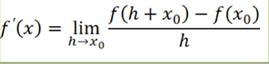, onde h+x0 seria a próxima posição, xo a posição em questão e h a variação do tempo

In [29]:
t=grf['Time']
dt=t[1]-t[0]
d1x=np.zeros(len(matrizangx))
d1z=np.zeros(len(matrizangz))
for i  in range(0,len(matrizangx)-1):
    prox=i+1
    d1x[i]=(matrizangx[prox]-matrizangx[i])/dt
    d1z[i]=(matrizangz[prox]-matrizangz[i])/dt
print(d1x)

[-0.00714961 -0.00690753 -0.00656982 ... -0.00207621 -0.00217171
  0.        ]


Fazemos então a segunda derivada:

In [32]:
d2x=np.zeros(len(d1x))
d2z=np.zeros(len(d1z))
for i in range(0,30):
    prox=i+1
    d2x[i]=(d1x[i+1]-d1x[i])/dt
    d2z[i]=(d1z[i+1]-d1z[i])/dt
print(d2x)

[0.02420806 0.03377094 0.02642648 ... 0.         0.         0.        ]


Com as derivadas feitas, precisamos fazer a função em si:

In [36]:
COPX= COGX[30:] - (4/3)*(d[30:]**4)*(1/9.8)*d2x
COPZ= COGZ[30:] - (4/3)*(d[30:]**4)*(1/9.8)*d2z

Para fazer o gráfico comparando o real e o estimado primeiro precisamos do real:

In [37]:
COPXreal=grf['COPNET_X']
COPZreal=grf['COPNET_Z']

Text(0, 0.5, 'COP')

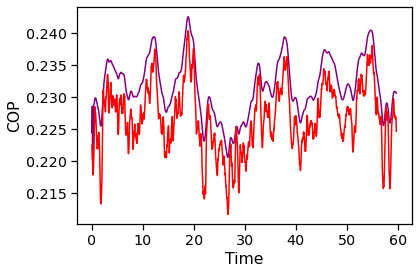

In [40]:
plt.plot(t[:-30],COPX,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Text(0, 0.5, 'COP')

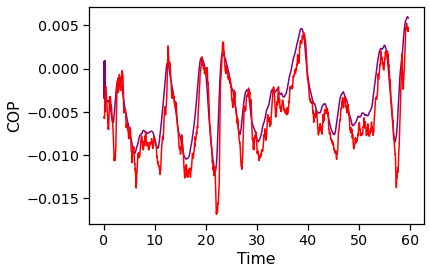

In [41]:
plt.plot(t[:-30],COPZ,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal[:-30],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')